# Proyek Akhir: Menyelesaikan Permasalahan Human Resources

- Nama: Steven Faustin Orginata
- Email: stevenfo0711@gmail.com
- Id Dicoding: steven-fo

## Persiapan

### Menyiapkan library yang dibutuhkan

In [84]:
import pandas as pd
import seaborn as sns
import numpy as np
import joblib
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score, make_scorer

### Menyiapkan data yang akan diguankan

In [85]:
df = pd.read_csv('data/employee_data.csv')
df.head()

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,NaN,Travel_Frequently,1444,Human Resources,1,4,Other,1,...,2,80,1,7,2,3,6,2,1,2
1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,...,1,80,0,15,2,1,1,0,0,0
2,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,...,3,80,3,18,2,4,10,0,2,7
3,4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,1,...,4,80,1,23,2,4,20,4,4,8
4,5,40,NaN,Travel_Rarely,1194,Research & Development,2,4,Medical,1,...,2,80,3,20,2,3,5,3,0,2


## Data Understanding

In [86]:
df.shape

(1470, 35)

In [87]:
df.columns

Index(['EmployeeId', 'Age', 'Attrition', 'BusinessTravel', 'DailyRate',
       'Department', 'DistanceFromHome', 'Education', 'EducationField',
       'EmployeeCount', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeId                1470 non-null   int64  
 1   Age                       1470 non-null   int64  
 2   Attrition                 1058 non-null   float64
 3   BusinessTravel            1470 non-null   object 
 4   DailyRate                 1470 non-null   int64  
 5   Department                1470 non-null   object 
 6   DistanceFromHome          1470 non-null   int64  
 7   Education                 1470 non-null   int64  
 8   EducationField            1470 non-null   object 
 9   EmployeeCount             1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   object 
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement            1470 non-null   int64  
 14  JobLevel

In [89]:
df.isna().sum()

EmployeeId                    0
Age                           0
Attrition                   412
BusinessTravel                0
DailyRate                     0
Department                    0
DistanceFromHome              0
Education                     0
EducationField                0
EmployeeCount                 0
EnvironmentSatisfaction       0
Gender                        0
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 0
MonthlyIncome                 0
MonthlyRate                   0
NumCompaniesWorked            0
Over18                        0
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
StandardHours                 0
StockOptionLevel              0
TotalWorkingYears             0
TrainingTimesLastYear         0
WorkLifeBalance               0
YearsAtC

Dari kode di atas, dapat dilihat bahwa ada data yang null. Data null ini harus dibuang karena merupakan data target atau label yang ingin di prediksi. Data null tidak bisa di-impute karena dapat menimbulkan bias atau kesalahan dalam prediksi.

In [90]:
df = df.dropna(subset=['Attrition'])

In [91]:
df['Attrition'].value_counts()

Attrition
0.0    879
1.0    179
Name: count, dtype: int64

Dari kode di atas, dapat dilihat bahwa ada ketidakseimbangan distribusi data label. Data dengan Label 1 akan lebih jelek diprediksi karena jumlah data yang sedikit, sementara data dengan label 0 membuat bias pada model karena jumlah data yang jauh lebih banyak sebesar 700 data.

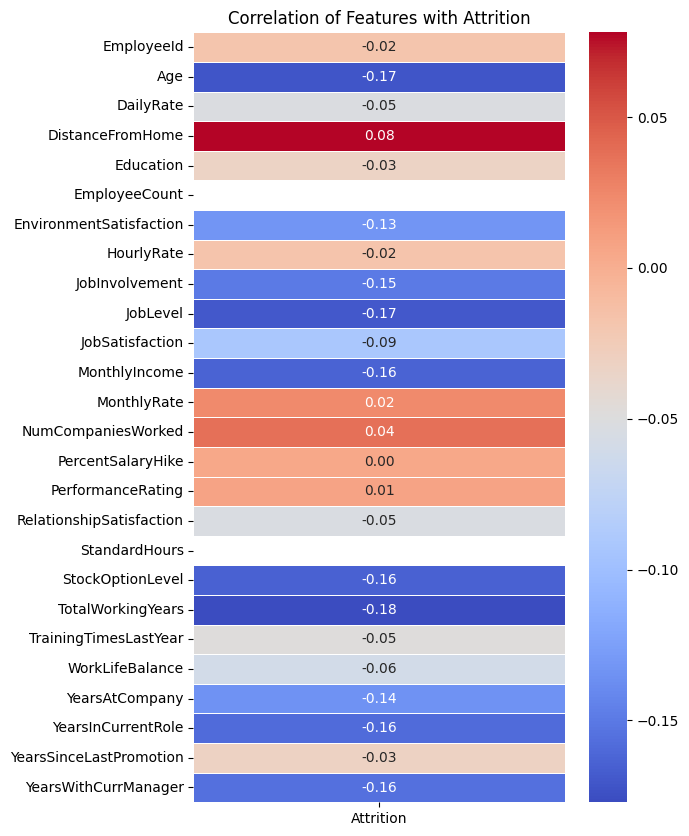

In [92]:
# Select numeric features
numeric_df = df.select_dtypes(include='number')

# Compute correlation matrix
correlation_matrix = numeric_df.corr()

# Extract correlation of all features with 'Attrition'
attrition_corr = correlation_matrix[['Attrition']].drop('Attrition')

# Plot heatmap
plt.figure(figsize=(6, 10))
sns.heatmap(attrition_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, cbar=True)

plt.title('Correlation of Features with Attrition')
plt.show()

Dari kode di atas, dapat dilihat korelasi fitur lain terhadap fitur Attrition. Untuk eksperimen, dapat diambil beberapa fitur menarik yang memiliki nilai absolut korelasi yang besar.

In [93]:
categorical_cols = [
    'BusinessTravel', 'Department', 'EducationField', 'Gender',
    'JobRole', 'MaritalStatus', 'OverTime'
]

anova_results = {}

for col in categorical_cols:
    groups = [df[df[col] == val]['Attrition'].dropna() for val in df[col].dropna().unique()]
    if len(groups) > 1:
        try:
            f_stat, p_val = f_oneway(*groups)
            anova_results[col] = {'F-statistic': f_stat, 'p-value': p_val}
        except Exception as e:
            anova_results[col] = {'error': str(e)}

anova_df = pd.DataFrame(anova_results).T.sort_values('p-value')
print(anova_df)

                F-statistic       p-value
OverTime          73.970314  2.828069e-17
JobRole            8.779605  1.131483e-11
MaritalStatus     19.449081  5.074128e-09
BusinessTravel     6.768417  1.200086e-03
EducationField     1.969441  8.063917e-02
Department         2.317216  9.904897e-02
Gender             0.266607  6.057248e-01


Fitur OverTime, JobRole, MaritalStatus, BusinessTravel memiliki nilai p-value yang kecil yang membuat mereka layak dicoba untuk menjadi fitur penting dalam prediksi Attrition

## Data Preparation / Preprocessing

In [94]:
# Define important features based on analysis
important_categorical = ['OverTime', 'JobRole', 'MaritalStatus', 'BusinessTravel']
important_numerical = ['JobLevel', 'JobInvolvement', 'MonthlyIncome', 'TotalWorkingYears',
                      'EnvironmentSatisfaction', 'WorkLifeBalance', 'YearsAtCompany']

selected_features_df = df[important_categorical + important_numerical + ['Attrition']]

In [95]:
for col in important_categorical:
    print(selected_features_df[col].value_counts())

OverTime
No     751
Yes    307
Name: count, dtype: int64
JobRole
Sales Executive              232
Research Scientist           214
Laboratory Technician        188
Manufacturing Director       107
Healthcare Representative     88
Manager                       79
Research Director             62
Sales Representative          58
Human Resources               30
Name: count, dtype: int64
MaritalStatus
Married     464
Single      352
Divorced    242
Name: count, dtype: int64
BusinessTravel
Travel_Rarely        746
Travel_Frequently    205
Non-Travel           107
Name: count, dtype: int64


In [96]:
categorical_cols = ['OverTime', 'MaritalStatus', 'BusinessTravel', 'JobRole']

encoder = OneHotEncoder(drop='first', dtype=int, sparse_output=False, handle_unknown='ignore')

encoded_cats = encoder.fit_transform(selected_features_df[categorical_cols])

encoded_cat_cols = encoder.get_feature_names_out(categorical_cols)

encoded_df = pd.DataFrame(encoded_cats, columns=encoded_cat_cols, index=selected_features_df.index)

numerical_cols = selected_features_df.drop(columns=categorical_cols + ['Attrition']).columns
selected_features_df_final = pd.concat([selected_features_df[numerical_cols],
                                        encoded_df,
                                        selected_features_df['Attrition']], axis=1)


In [97]:
def detect_outliers_iqr(df):
    outliers = {}
    for column in df.select_dtypes(include=np.number).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[column] = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

In [98]:
# Detect outliers
outliers = detect_outliers_iqr(selected_features_df_final)

# Print outliers for each column
for column, data in outliers.items():
    print(f"Outliers in {column}: {data}")

Outliers in JobLevel: Empty DataFrame
Columns: [JobLevel, JobInvolvement, MonthlyIncome, TotalWorkingYears, EnvironmentSatisfaction, WorkLifeBalance, YearsAtCompany, OverTime_Yes, MaritalStatus_Married, MaritalStatus_Single, BusinessTravel_Travel_Frequently, BusinessTravel_Travel_Rarely, JobRole_Human Resources, JobRole_Laboratory Technician, JobRole_Manager, JobRole_Manufacturing Director, JobRole_Research Director, JobRole_Research Scientist, JobRole_Sales Executive, JobRole_Sales Representative, Attrition]
Index: []

[0 rows x 21 columns]
Outliers in JobInvolvement: Empty DataFrame
Columns: [JobLevel, JobInvolvement, MonthlyIncome, TotalWorkingYears, EnvironmentSatisfaction, WorkLifeBalance, YearsAtCompany, OverTime_Yes, MaritalStatus_Married, MaritalStatus_Single, BusinessTravel_Travel_Frequently, BusinessTravel_Travel_Rarely, JobRole_Human Resources, JobRole_Laboratory Technician, JobRole_Manager, JobRole_Manufacturing Director, JobRole_Research Director, JobRole_Research Scientis

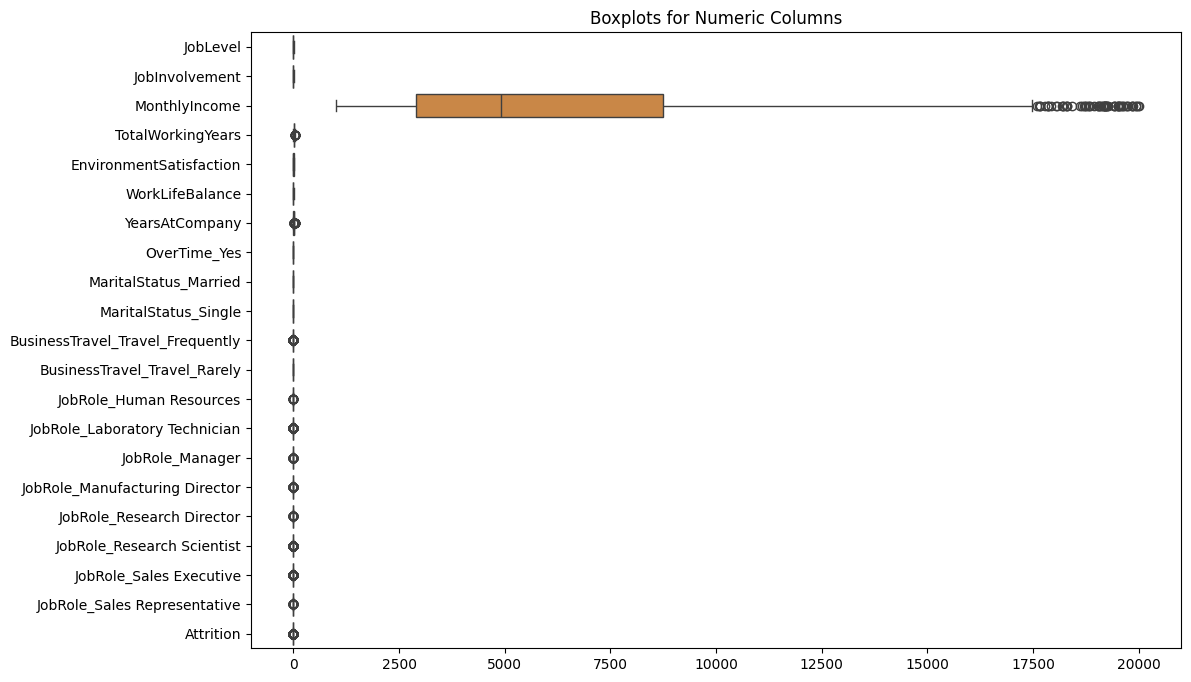

In [99]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=selected_features_df_final.select_dtypes(include=np.number), orient='h')
plt.title("Boxplots for Numeric Columns")
plt.show()

Dari gambar di atas, dapat dilihat fitur MonthlyIncome memiliki banyak outlier. Namun, karena outlier tersebut tidak berbeda jauh atau parah, outlier tersebut tidak dibuang agar model dapat mempelajari datanya.

In [100]:
X = pd.get_dummies(selected_features_df_final.drop('Attrition', axis=1), drop_first=True)
y = selected_features_df_final['Attrition']

In [101]:
# Check class distribution
print("Class distribution in training set:")
print(y.value_counts(normalize=True))

Class distribution in training set:
Attrition
0.0    0.830813
1.0    0.169187
Name: proportion, dtype: float64


In [102]:
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)
print("Class distribution after oversampling:")
print(y_resampled.value_counts(normalize=True))

Class distribution after oversampling:
Attrition
1.0    0.5
0.0    0.5
Name: proportion, dtype: float64


In [103]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.25, random_state=42, stratify=y_resampled)

# Scale numerical features
scaler = StandardScaler()
numerical_features = [col for col in X_resampled.columns if any(num_feat in col for num_feat in important_numerical)]
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
X_train_scaled[numerical_features] = scaler.fit_transform(X_train_scaled[numerical_features])
X_test_scaled[numerical_features] = scaler.transform(X_test_scaled[numerical_features])

## Modeling

In [104]:
rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42
)

In [105]:
rf.fit(X_train_scaled, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=5,
                       random_state=42)

In [106]:
y_pred = rf.predict(X_test_scaled)
y_prob = rf.predict_proba(X_test_scaled)[:, 1]

## Evaluation

In [107]:
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

In [108]:
print(f"Random Forest Model Results:")
print(f"Accuracy: {accuracy:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Random Forest Model Results:
Accuracy: 0.8955
ROC AUC: 0.9648

Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.86      0.89       220
         1.0       0.87      0.93      0.90       220

    accuracy                           0.90       440
   macro avg       0.90      0.90      0.90       440
weighted avg       0.90      0.90      0.90       440



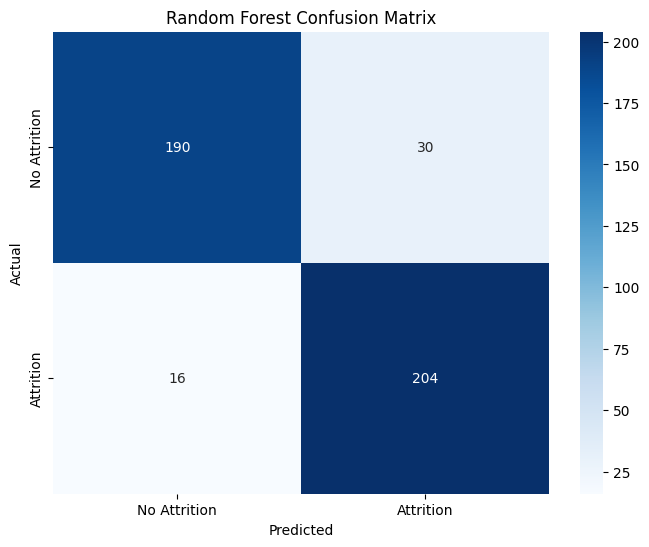

In [109]:
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Attrition', 'Attrition'],
            yticklabels=['No Attrition', 'Attrition'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix')
plt.show()

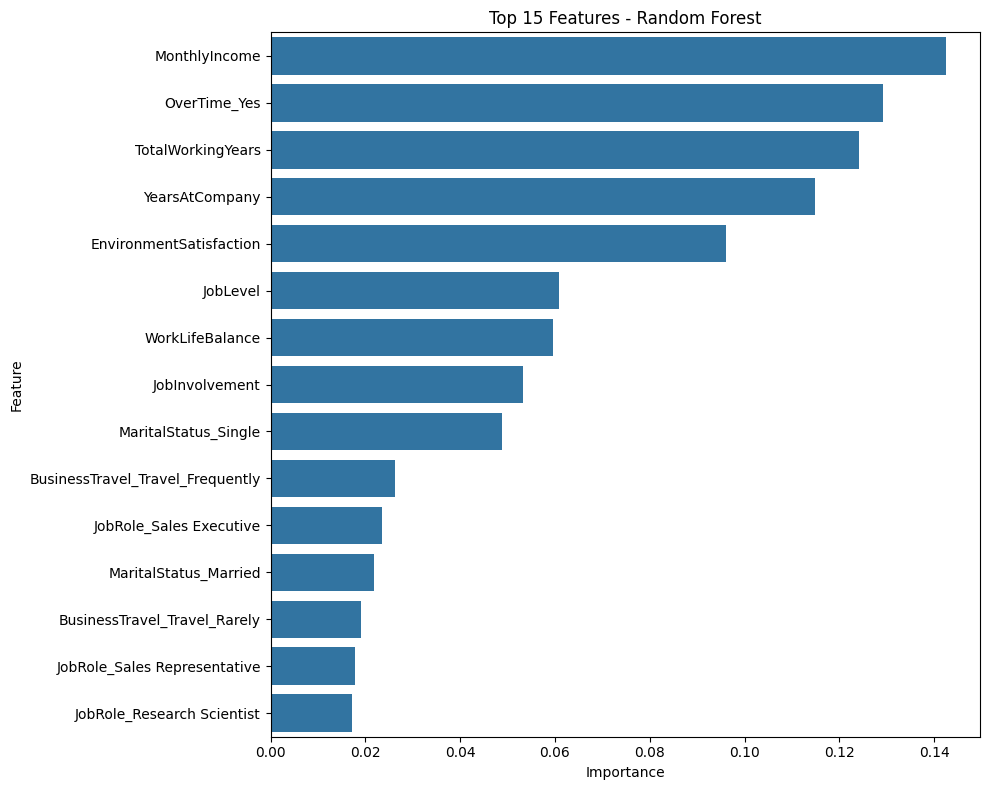

In [110]:
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(15))
plt.title('Top 15 Features - Random Forest')
plt.tight_layout()
plt.show()

In [111]:
top_features = feature_importance.head(15)
print("Top 15 most important features:")
print(top_features)

Top 15 most important features:
                             Feature  Importance
2                      MonthlyIncome    0.142565
7                       OverTime_Yes    0.129236
3                  TotalWorkingYears    0.124098
6                     YearsAtCompany    0.114880
4            EnvironmentSatisfaction    0.096142
0                           JobLevel    0.060877
5                    WorkLifeBalance    0.059671
1                     JobInvolvement    0.053281
9               MaritalStatus_Single    0.048774
10  BusinessTravel_Travel_Frequently    0.026260
18           JobRole_Sales Executive    0.023536
8              MaritalStatus_Married    0.021732
11      BusinessTravel_Travel_Rarely    0.018987
19      JobRole_Sales Representative    0.017760
17        JobRole_Research Scientist    0.017087


Hyperparam Tuning

In [112]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

In [113]:
scorer = make_scorer(roc_auc_score)

# Initialize Random Forest model for grid search
rf_grid = RandomForestClassifier(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=rf_grid,
    param_grid=param_grid,
    scoring=scorer,
    cv=5,
    n_jobs=-1,
    verbose=2
)


In [114]:
print("Starting grid search...")
grid_search.fit(X_train_scaled, y_train)
print("Grid search completed!")

# Get the best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best ROC AUC score:", grid_search.best_score_)

Starting grid search...
Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Grid search completed!
Best parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best ROC AUC score: 0.9407876474670367


In [115]:
best_rf = grid_search.best_estimator_

In [116]:
y_pred_tuned = best_rf.predict(X_test_scaled)
y_prob_tuned = best_rf.predict_proba(X_test_scaled)[:, 1]

In [117]:
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
roc_auc_tuned = roc_auc_score(y_test, y_prob_tuned)

In [118]:
print("\nTuned Random Forest Results:")
print(f"Accuracy: {accuracy_tuned:.4f}")
print(f"ROC AUC: {roc_auc_tuned:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_tuned))


Tuned Random Forest Results:
Accuracy: 0.9386
ROC AUC: 0.9950

Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      0.89      0.94       220
         1.0       0.90      0.99      0.94       220

    accuracy                           0.94       440
   macro avg       0.94      0.94      0.94       440
weighted avg       0.94      0.94      0.94       440



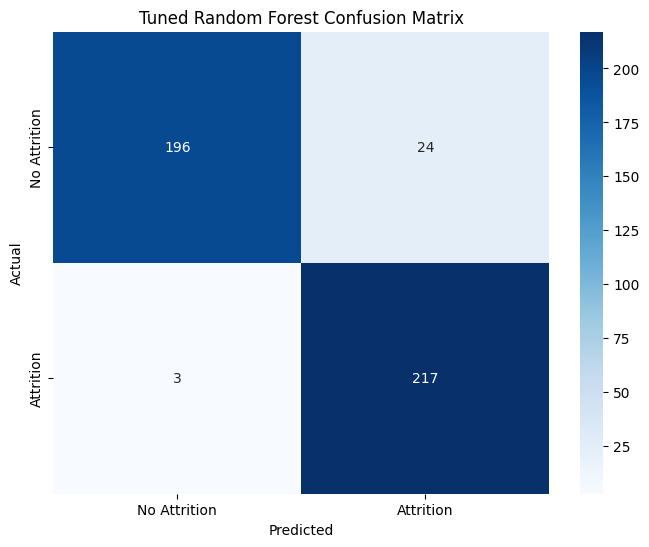

In [119]:
# Plot confusion matrix for tuned model
plt.figure(figsize=(8, 6))
cm_tuned = confusion_matrix(y_test, y_pred_tuned)
sns.heatmap(cm_tuned, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Attrition', 'Attrition'],
            yticklabels=['No Attrition', 'Attrition'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Tuned Random Forest Confusion Matrix')
plt.show()

Perbedaan signifikan yang terlihat adalah jumlah false prediction pada no attrition sementara actualnya attrition berkurang cukup banyak, dari 18 menjadi 3. Hal ini menunjukkan model dapat mempelajari label no attrition dengan baik sehingga tidak terklasifikasi menjadi attrition.

Save Model

In [120]:
joblib.dump(best_rf, 'attrition_model.pkl')
joblib.dump(encoder, 'onehot_encoder.pkl')

['onehot_encoder.pkl']